# Temat testów

### Czy istnieje istotna statystycznie korelacja między poprawnością odpowiedzi a czasem odpowiedzi? 

In [1]:
import pandas as pd

from functions.tests.correlations import correlation_independent_groups_test
from functions.set_preparations import prepare_row
from functions.plots import plot_multi_boxplot, plot_multi_density

In [2]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv')

df_merge = df_answers.merge(df_time, on='ID')
df_merge.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Corr_all,1a_corr,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,SumTime_all,SumTime_a,SumTime_b,SumTime_1,SumTime_2,SumTime_3
0,1,3,1,4,3,4,4,19,4,1,...,54481,58697,56314,63897,276921,138810,138110,43531,113178,120211
1,2,1,2,3,1,2,4,13,5,1,...,42248,85329,47948,129427,459647,156426,303219,154693,127577,177375
2,3,2,1,3,1,1,1,9,4,1,...,45165,32732,8000,61197,299890,121995,177892,152793,77897,69197
3,4,3,2,2,1,3,5,16,5,1,...,12449,37715,60980,101795,337437,119477,217956,124494,50164,162775
4,5,4,2,3,2,3,3,17,6,1,...,55931,22132,34898,62930,271458,158809,112644,95562,78063,97828


In [3]:
df_time.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,40.0,19.500,11.690452,0.0,9.75,19.5,29.25,39.0
ID,40.0,24.600,13.343201,1.0,14.75,24.5,35.50,46.0
Duration_1a,40.0,52403.675,18085.029493,28015.0,39714.50,52705.5,62955.50,117478.0
Duration_1b,40.0,50364.550,24844.453825,15516.0,30481.50,44781.0,66255.00,112511.0
Duration_2a,40.0,34225.000,23195.850356,8416.0,15745.00,27232.0,45294.00,98295.0
Duration_2b,40.0,55594.400,28714.159003,12066.0,33344.00,53205.5,71830.00,121461.0
Duration_3a,40.0,42925.775,22404.602238,8000.0,22594.75,39856.0,57476.50,100562.0
Duration_3b,40.0,80122.275,35611.747787,18282.0,56526.50,73571.0,105428.00,144209.0
SumTime_all,40.0,315660.275,93454.841743,155010.0,246927.00,292472.0,387472.75,497887.0
SumTime_a,40.0,129554.450,39260.116564,48881.0,99677.75,121128.0,151463.25,216222.0


In [4]:
# Utworzenie kolekcji:
# wszystkie grafiki
corr = prepare_row(df_merge.filter(regex='.*_corr$'))
time = prepare_row(df_merge.filter(regex='Duration'))
df_collAll = pd.DataFrame({'correctness': corr, 'time': time})

# grafiki A
corr = prepare_row(df_merge.filter(regex='.*a_corr$'))
time = prepare_row(df_merge.filter(regex='Duration_.*a'))
df_collA = pd.DataFrame({'correctness': corr, 'time': time})

# grafiki B
corr = prepare_row(df_merge.filter(regex='.*b_corr$'))
time = prepare_row(df_merge.filter(regex='Duration_.*b'))
df_collB = pd.DataFrame({'correctness': corr, 'time': time})

# grafiki 1
corr = prepare_row(df_merge.filter(regex='1.*_corr$'))
time = prepare_row(df_merge.filter(regex='Duration_1'))
df_coll1 = pd.DataFrame({'correctness': corr, 'time': time})

# grafiki 2
corr = prepare_row(df_merge.filter(regex='2.*_corr$'))
time = prepare_row(df_merge.filter(regex='Duration_2'))
df_coll2 = pd.DataFrame({'correctness': corr, 'time': time})

# grafiki 3
corr = prepare_row(df_merge.filter(regex='3.*_corr$'))
time = prepare_row(df_merge.filter(regex='Duration_3'))
df_coll3 = pd.DataFrame({'correctness': corr, 'time': time})

**H0:** Nie ma istotnej statystycznie korelacji między poprawnością odpowiedzi a czasem odpowiedzi.

**H1:** Istnieje istotna statystycznie korelacja między poprawnością odpowiedzi a czasem odpowiedzi.

**Poziom istotności:** $\alpha=0.05$

In [5]:
ALPHA = 0.05

#### Testy dla zsumowanych grafik

In [6]:
# wszystkie grafiki
correlation_independent_groups_test(df_merge['SumTime_all'], df_merge['Corr_all'], ALPHA)

Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.0003861088760879186
P-value: 0.99811338020953
Brak podstaw do odrzucenia H0.


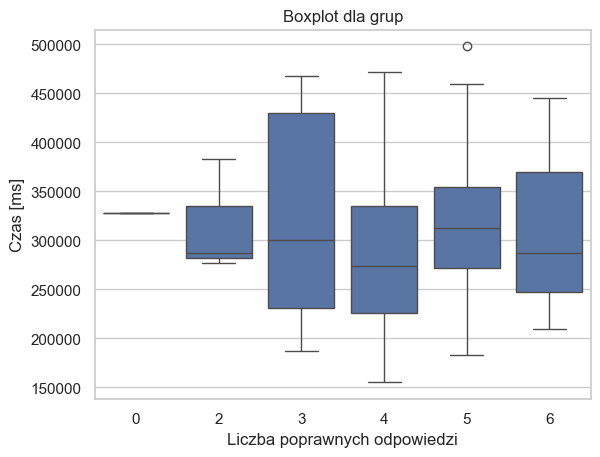

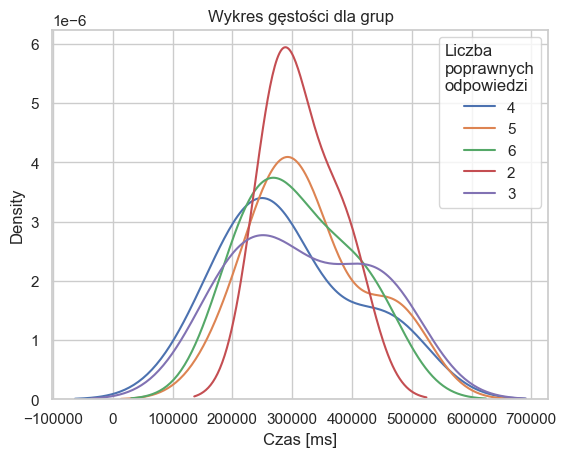

In [7]:
plot_multi_boxplot(df_merge, 'Corr_all', 'SumTime_all', 'Liczba poprawnych odpowiedzi', 'Czas [ms]')
plot_multi_density(df_merge, 'SumTime_all', 'Corr_all', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi')

In [8]:
# grafiki A i B
correlation_independent_groups_test(df_merge['SumTime_a'], df_merge['SumCorr_a'], ALPHA)
print('------------------------------')
correlation_independent_groups_test(df_merge['SumTime_b'], df_merge['SumCorr_b'], ALPHA)

Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.2538076321657207
P-value: 0.11403353352833252
Brak podstaw do odrzucenia H0.
------------------------------
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.17067801855335882
P-value: 0.29234853727765525
Brak podstaw do odrzucenia H0.


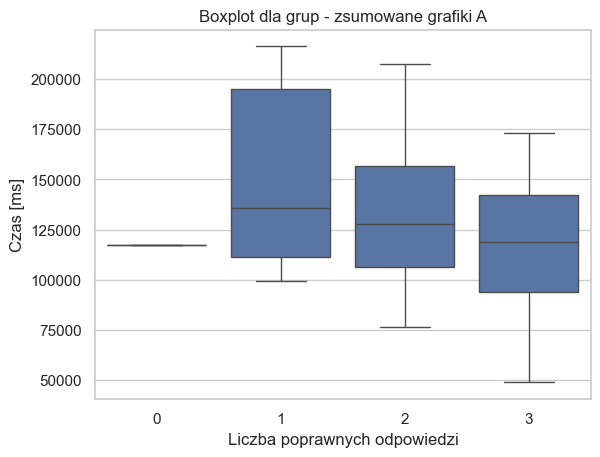

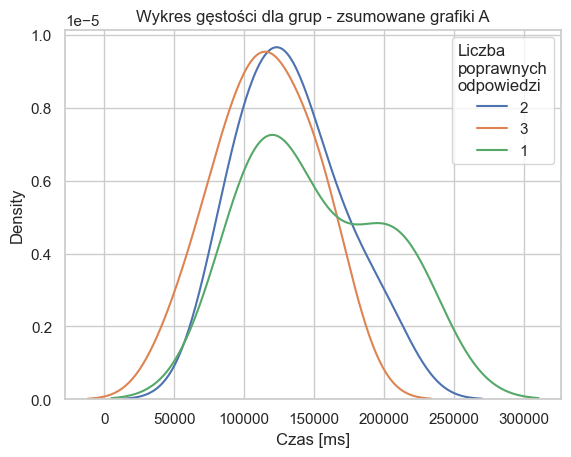

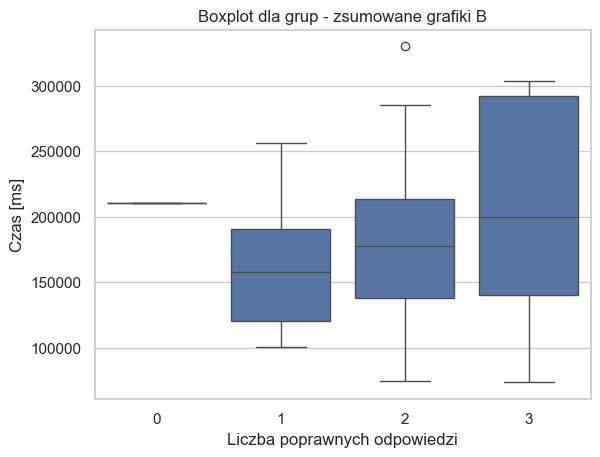

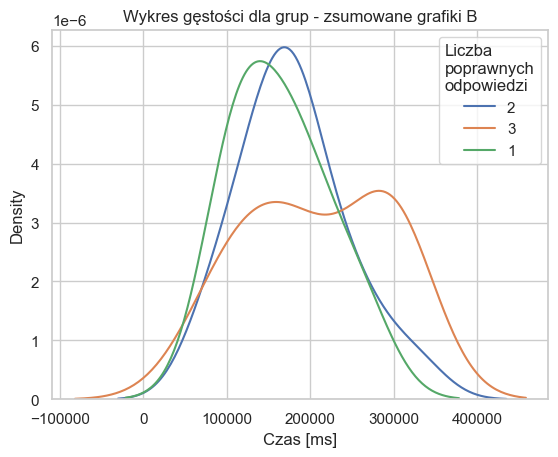

In [9]:
plot_multi_boxplot(df_merge, 'SumCorr_a', 'SumTime_a', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki A')
plot_multi_density(df_merge, 'SumTime_a', 'SumCorr_a', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki A')

plot_multi_boxplot(df_merge, 'SumCorr_b', 'SumTime_b', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki B')
plot_multi_density(df_merge, 'SumTime_b', 'SumCorr_b', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki B')

In [10]:
# grafiki 1, 2, 3
correlation_independent_groups_test(df_merge['SumTime_1'], df_merge['SumCorr_1'], ALPHA)
print('------------------------------')
correlation_independent_groups_test(df_merge['SumTime_2'], df_merge['SumCorr_2'], ALPHA)
print('------------------------------')
correlation_independent_groups_test(df_merge['SumTime_3'], df_merge['SumCorr_3'], ALPHA)

Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.015723566468230525
P-value: 0.9232846697547721
Brak podstaw do odrzucenia H0.
------------------------------
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.5056360294375346
P-value: 0.0008739780375695082
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
------------------------------
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.41380190914555703
P-value: 0.0079479797984621
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


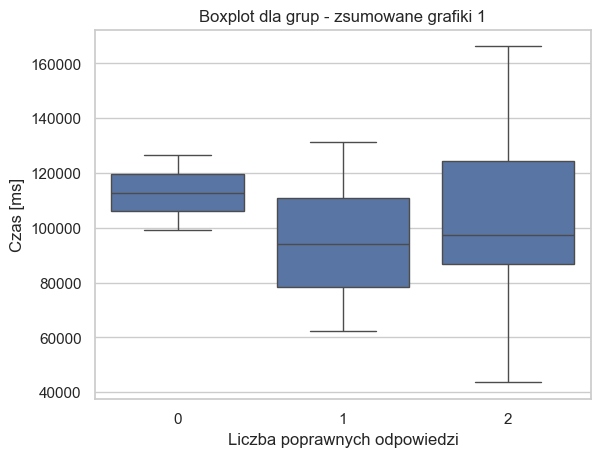

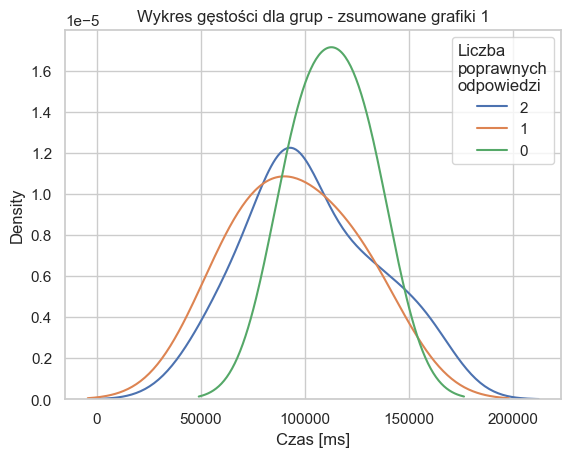

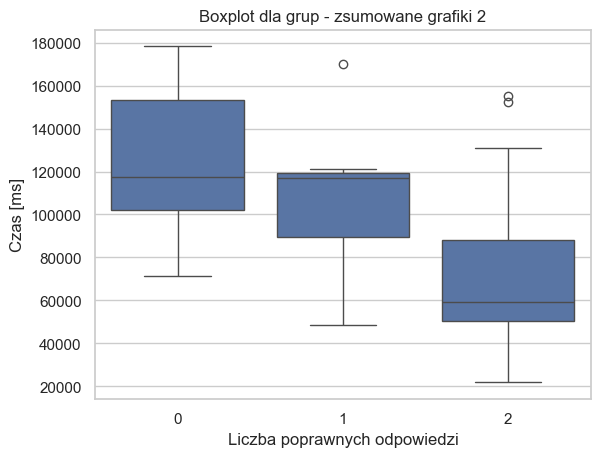

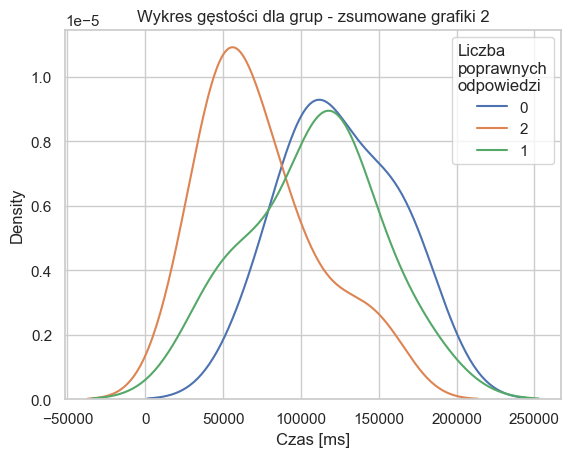

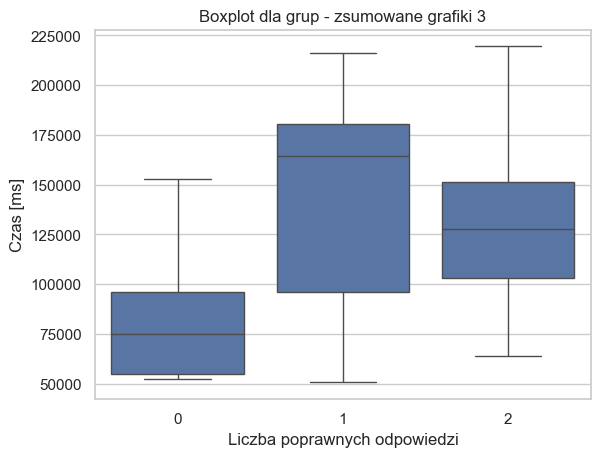

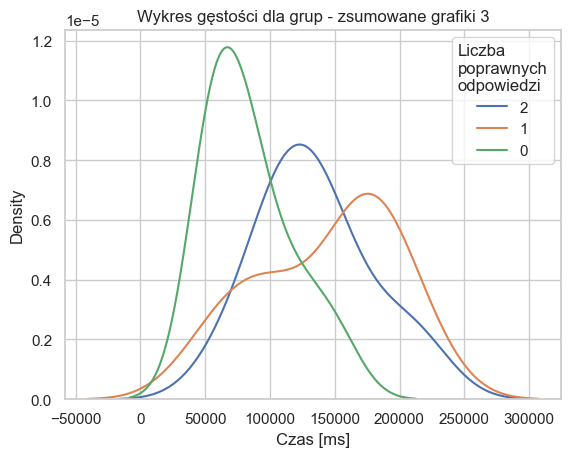

In [11]:
plot_multi_boxplot(df_merge, 'SumCorr_1', 'SumTime_1', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki 1')
plot_multi_density(df_merge, 'SumTime_1', 'SumCorr_1', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki 1')

plot_multi_boxplot(df_merge, 'SumCorr_2', 'SumTime_2', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki 2')
plot_multi_density(df_merge, 'SumTime_2', 'SumCorr_2', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki 2')

plot_multi_boxplot(df_merge, 'SumCorr_3', 'SumTime_3', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki 3')
plot_multi_density(df_merge, 'SumTime_3', 'SumCorr_3', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki 3')

#### Wizualizacje dla kolekcji

In [12]:
# wszystkie grafiki
# conduct_categorical_vs_quantitative_for_many_groups_test(df_collAll, 'time', 'correctness', ALPHA)

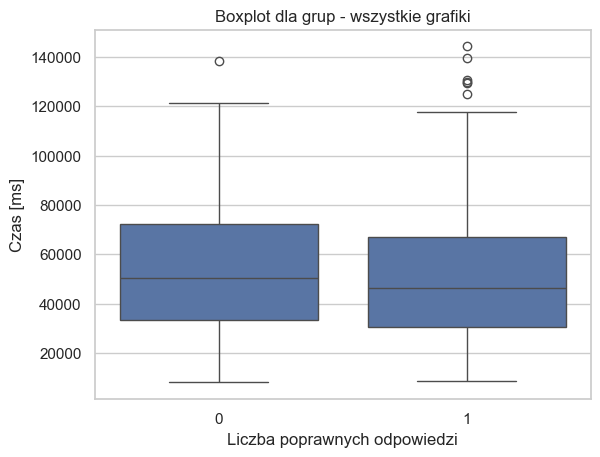

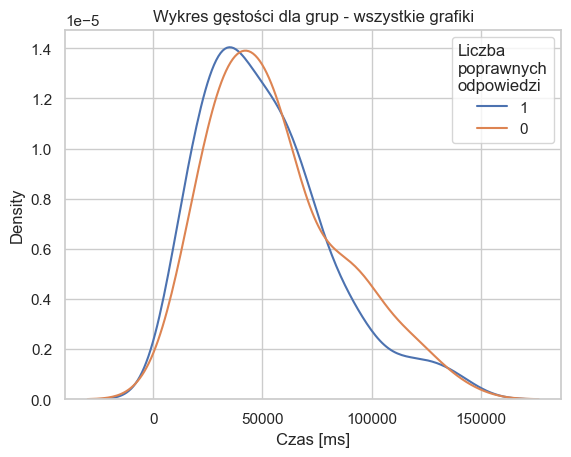

In [13]:
plot_multi_boxplot(df_collAll, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - wszystkie grafiki')
plot_multi_density(df_collAll, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - wszystkie grafiki')

In [14]:
# grafiki A i B
# conduct_categorical_vs_quantitative_for_many_groups_test(df_collA, 'time', 'correctness', ALPHA)
# print('-------------------------------')
# conduct_categorical_vs_quantitative_for_many_groups_test(df_collB, 'time', 'correctness', ALPHA)

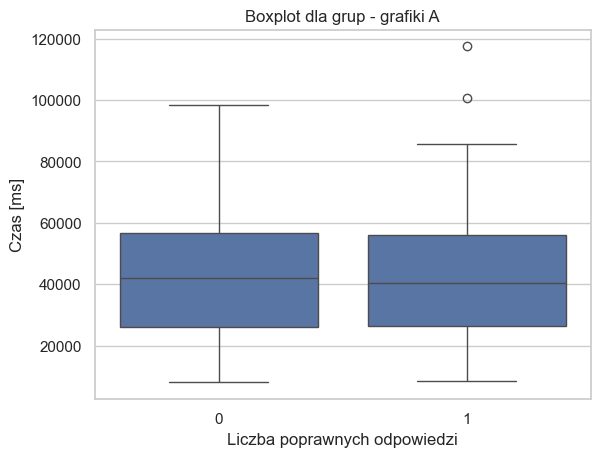

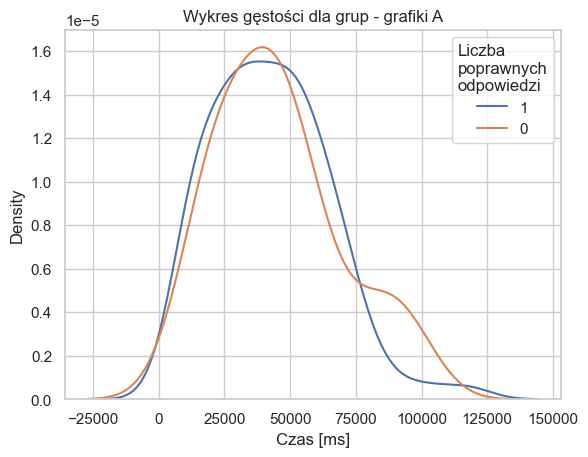

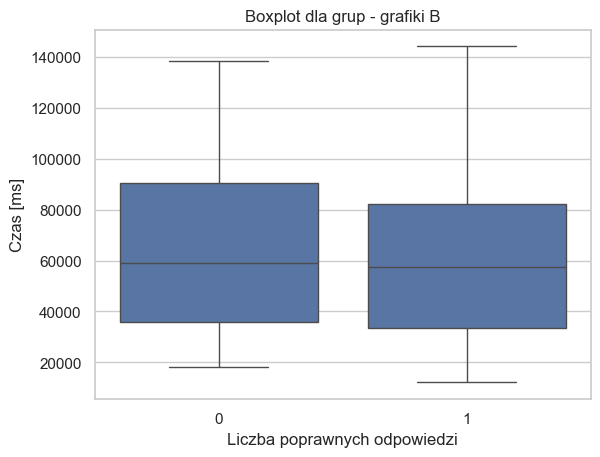

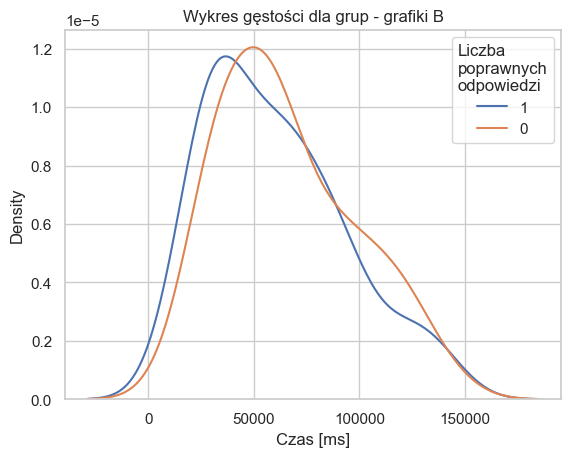

In [15]:
plot_multi_boxplot(df_collA, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - grafiki A')
plot_multi_density(df_collA, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - grafiki A')

plot_multi_boxplot(df_collB, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - grafiki B')
plot_multi_density(df_collB, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - grafiki B')

In [16]:
# grafiki 1, 2, 3
# conduct_categorical_vs_quantitative_for_many_groups_test(df_coll1, 'time', 'correctness', ALPHA)
# print('----------------------------')
# conduct_categorical_vs_quantitative_for_many_groups_test(df_coll2, 'time', 'correctness', ALPHA)
# print('----------------------------')
# conduct_categorical_vs_quantitative_for_many_groups_test(df_coll3, 'time', 'correctness', ALPHA)

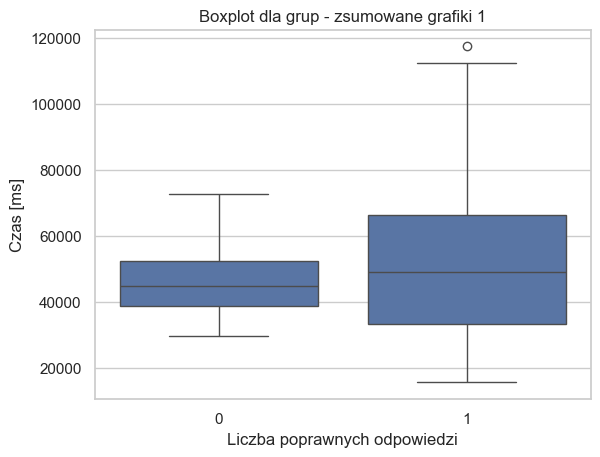

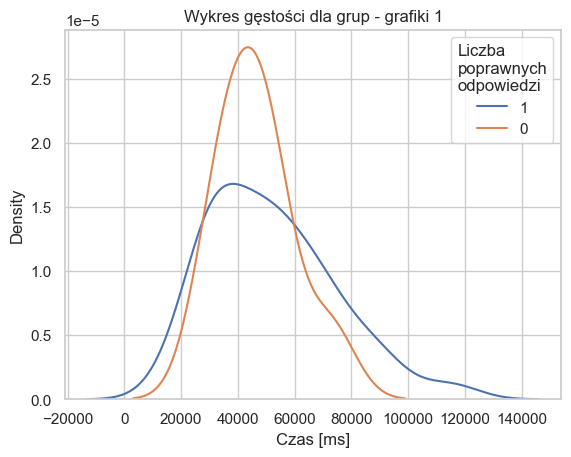

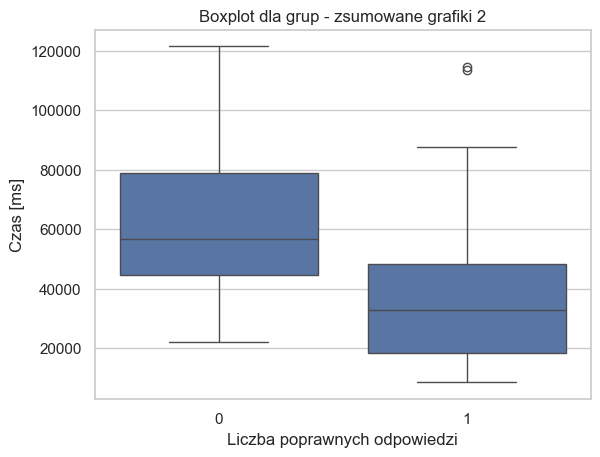

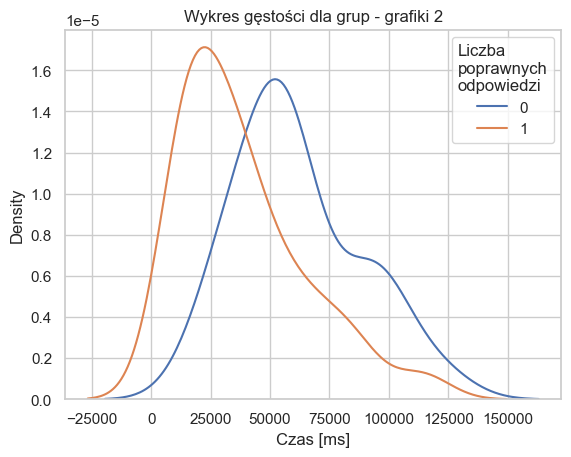

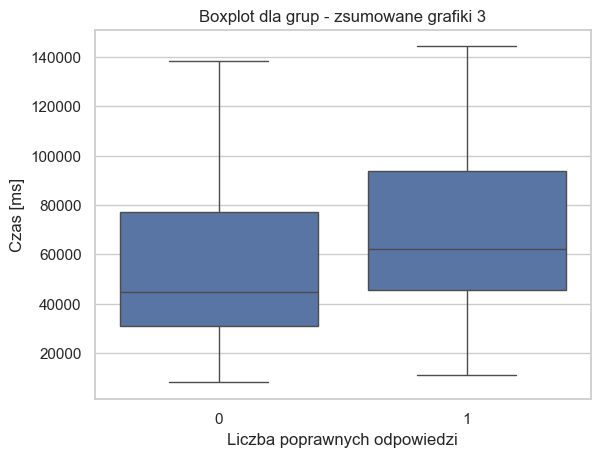

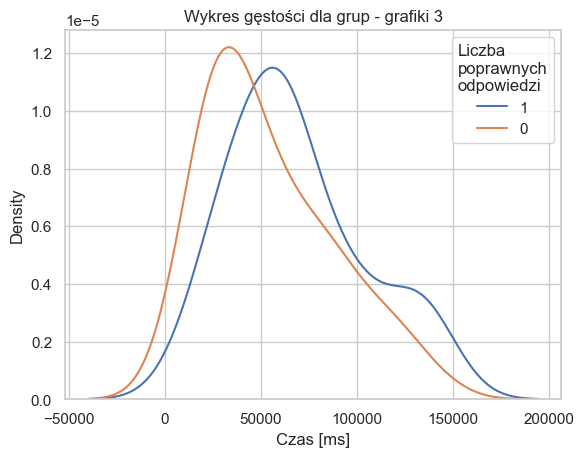

In [17]:
plot_multi_boxplot(df_coll1, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki 1')
plot_multi_density(df_coll1, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - grafiki 1')

plot_multi_boxplot(df_coll2, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki 2')
plot_multi_density(df_coll2, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - grafiki 2')

plot_multi_boxplot(df_coll3, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup - zsumowane grafiki 3')
plot_multi_density(df_coll3, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - grafiki 3')

#### Testy dla każdej grafiki oddzielnie: 1a, 1b, 2a, 2b, 3a, 3b

In [18]:
df1a = pd.DataFrame({'time': df_merge['Duration_1a'], 'correctness': df_merge['1a_corr']})
df2a = pd.DataFrame({'time': df_merge['Duration_2a'], 'correctness': df_merge['2a_corr']})
df3a = pd.DataFrame({'time': df_merge['Duration_3a'], 'correctness': df_merge['3a_corr']})

df1b = pd.DataFrame({'time': df_merge['Duration_1b'], 'correctness': df_merge['1b_corr']})
df2b = pd.DataFrame({'time': df_merge['Duration_2b'], 'correctness': df_merge['2b_corr']})
df3b = pd.DataFrame({'time': df_merge['Duration_3b'], 'correctness': df_merge['3b_corr']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [19]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    correlation_independent_groups_test(df['time'], df['correctness'], ALPHA)

-------------------------------------
1a:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.10805162707788583
P-value: 0.5069106346488899
Brak podstaw do odrzucenia H0.
-------------------------------------
1b:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.012333778956249198
P-value: 0.9397891329132312
Brak podstaw do odrzucenia H0.
-------------------------------------
2a:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.6474665249418058
P-value: 6.314306617736327e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------------------
2b:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.20128858473306305
P-value: 0.2129527272662666
Brak podstaw do odrzucenia H0.
---------------------------------

-------------------------------------
1a:


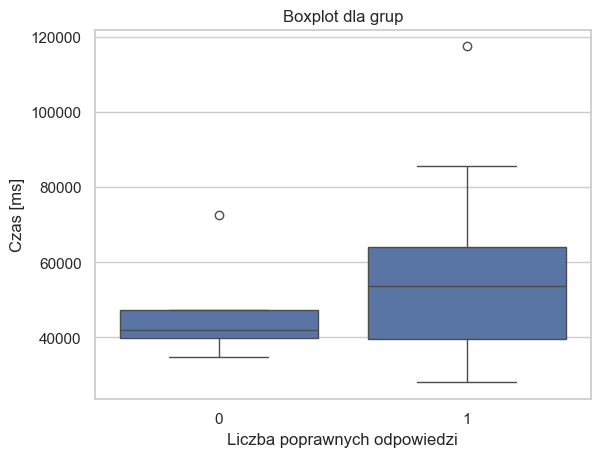

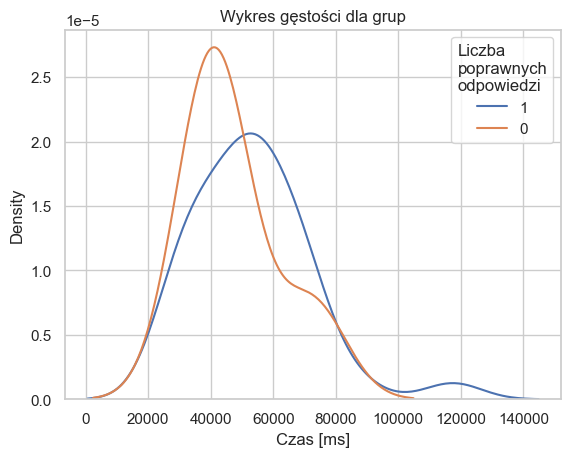

-------------------------------------
1b:


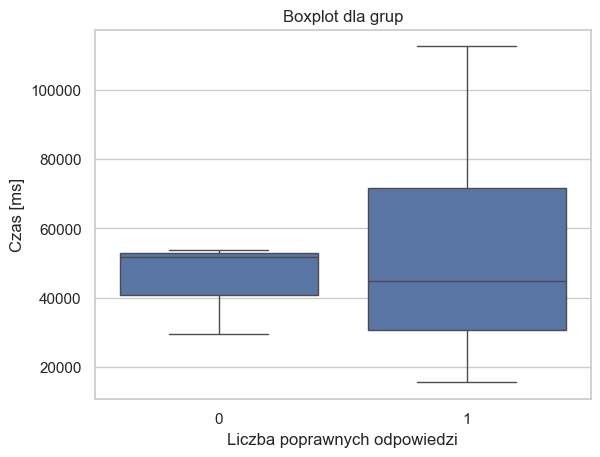

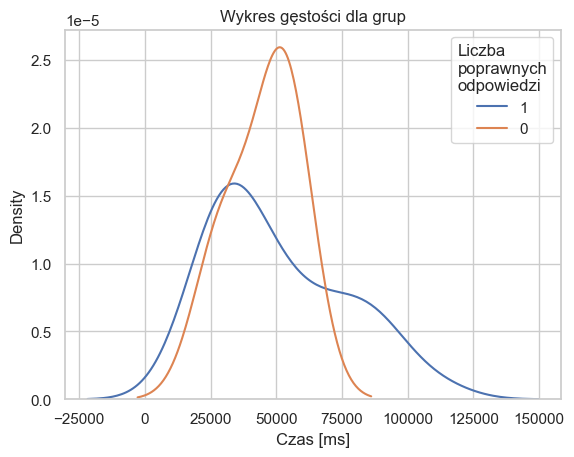

-------------------------------------
2a:


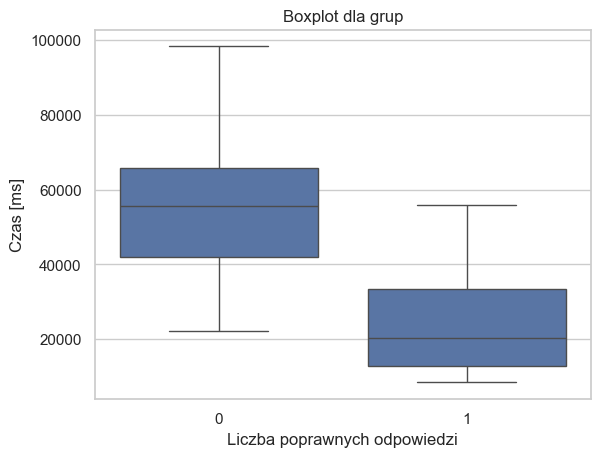

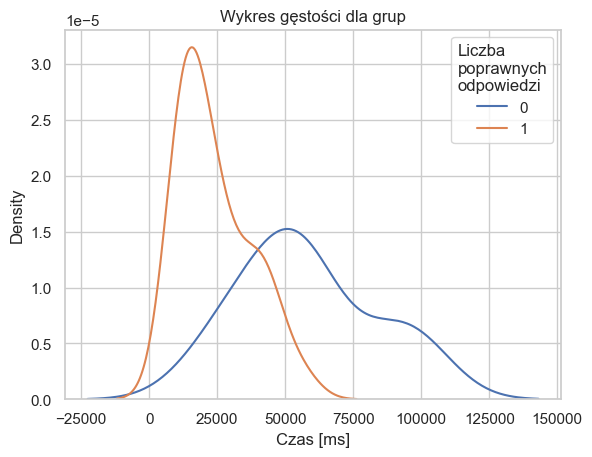

-------------------------------------
2b:


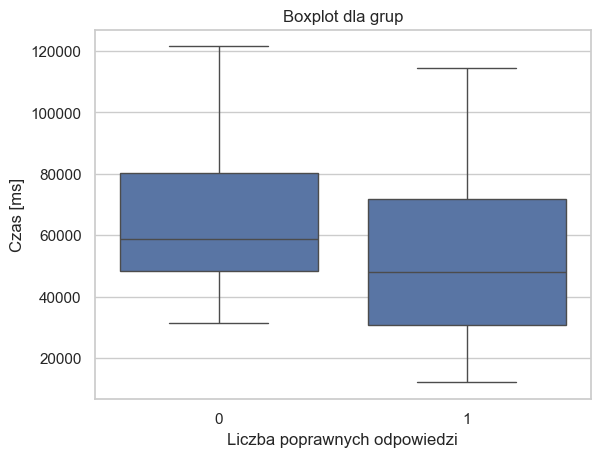

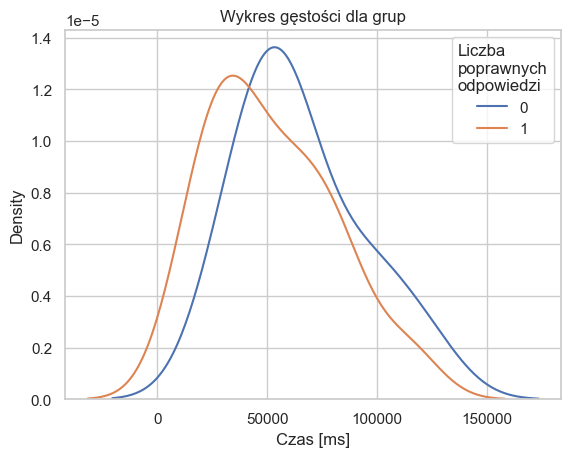

-------------------------------------
3a:


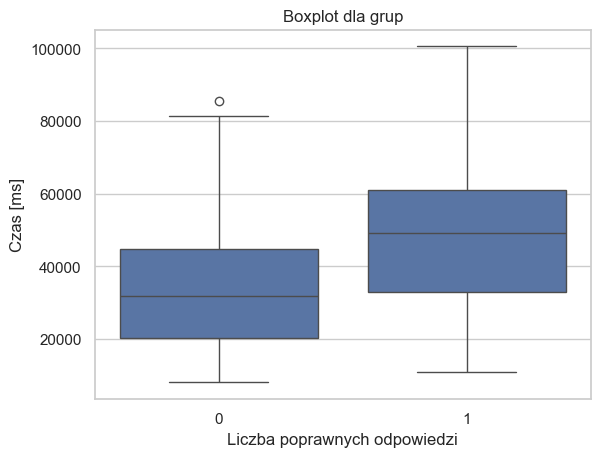

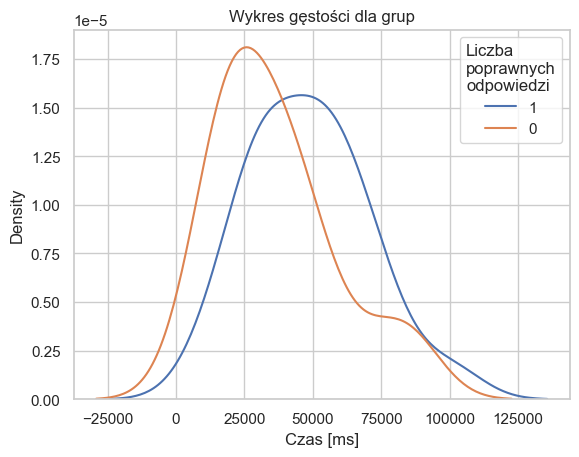

-------------------------------------
3b:


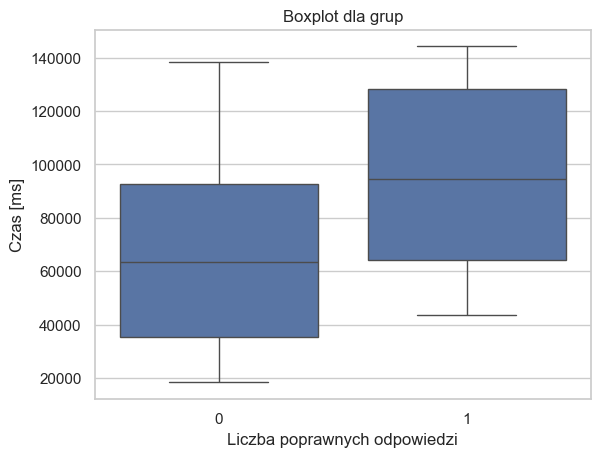

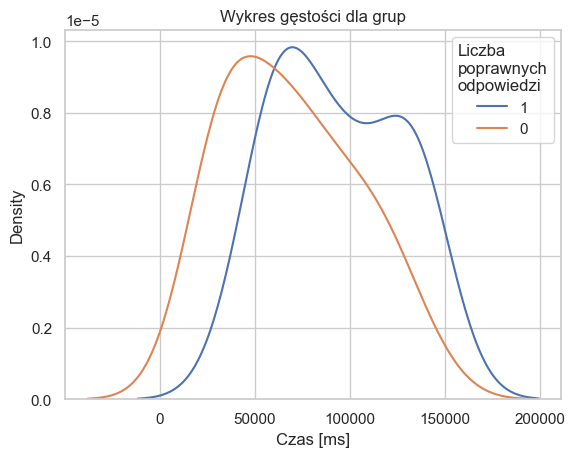

In [20]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    plot_multi_boxplot(df, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [ms]', title='Boxplot dla grup')
    plot_multi_density(df, 'time', 'correctness', 'Czas [ms]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup')

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a czasem odpowiedzi na poziomie istotności $\alpha=0.05$ dla:

- zsumowane grafiki 2 (wraz ze wzrostem czasu spadało prawodpodobieństwo udzielenia poprawnej odpowiedzi)
- zsumowane grafiki 3
- grafika 2a (wraz ze wzrostem czasu spadało prawodpodobieństwo udzielenia poprawnej odpowiedzi)
- grafika 3a
- grafika 3b (wraz ze wzrostem czasu wzrastało prawodpodobieństwo udzielenia poprawnej odpowiedzi)

Potwierdzenie obserwacji: grafiki 2 były proste i niektórzy uczestnicy doszukiwali się 'haczyka', a grafiki 3 były trudne i im dłużej uczestnik zastanawiał się na tym pytaniem, tym była większa szansa, że poprawnie zrozumie polecenie